In [ ]:
import os
import operator
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

from palettable.colorbrewer.sequential import YlGn_9
from palettable.colorbrewer.sequential import GnBu_8
from palettable.cmocean.sequential import Tempo_10
from palettable.colorbrewer.diverging import PuOr_7
from palettable.cartocolors.sequential import PurpOr_6
from palettable.wesanderson import Aquatic2_5
from palettable.colorbrewer.qualitative import Dark2_4

from ideotype.data_process import (read_data,
                                   fetch_norm_mean_disp,
                                   fetch_mean_disp_diff,
                                   fetch_sim_values)
from ideotype.analysis import (rank_top_phenos, 
                               identify_top_phenos,
                               identify_improved_phenos, 
                               phenostage_climate)
from ideotype.figures import (plot_rankchange,
                              plot_params_heatmap,
                              plot_cspace_rank,
                              plot_cspace_yield,
                              plot_mean_disp_change)
from ideotype.init_params import params_sample
from ideotype.utils import fold
from ideotype.data_process import parse_mature
from ideotype import DATA_PATH

In [8]:
# Read in data etc.
run_name = 'present'
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_extended, df_stuck = parse_mature(df_all)
df_all.drop(df_stuck.index, inplace=True)
df_all.site = df_all.site.astype(int)
df_wea.site = df_wea.site.astype(int)

In [3]:
# Read in data etc.
run_name = 'present'
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_extended, df_stuck = parse_mature(df_all)
df_all.drop(df_stuck.index, inplace=True)

# Queried maizsim outputs
df_sims = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_yield.csv'))
df_phys = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_phys.csv'))
df_carbon = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_carbon.csv'))
df_mass = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_mass.csv'))
df_leaves = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_leaves.csv'))
df_waterdeficit = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit.csv'))
df_waterdeficit_sum = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit_sum.csv'))
df_waterpotential = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterpotential.csv'))
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
df_gseason_climate = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_gseason_climate.csv'))

In [26]:
# Read in data for future sims
run_name = 'f2100'
df_sims, df_sites, df_wea, df_params, df_all_f2100, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_extended, df_stuck = parse_mature(df_all_f2100)
df_all_f2100.drop(df_stuck.index, inplace=True)

In [13]:
# fetch emergent properties
phenos_ranked = rank_top_phenos('present', 100, 1, 1)
df_pheno_gf = df_phenology[df_phenology.pheno == '"grainFill"']

# grain-filling length
gf_lengths = []
for pheno in phenos_ranked:
    df_sub = df_pheno_gf.query(f'cvar=={pheno}')
    gf_length = df_sub.mean()['pheno_days']
    gf_lengths.append(gf_length)
    
# grain-filling length
gf_startdates = []
for pheno in phenos_ranked:
    df_sub = df_pheno_gf.query(f'cvar=={pheno}')
    gf_startdate = df_sub.mean()['jday']
    gf_startdates.append(gf_startdate)
    
# leaf areas
LA = fetch_sim_values(df_leaves, '"grainFill"', 'LA', phenos_ranked)

## Relationship between yield & climate

Text(0, 0.5, 'rank')

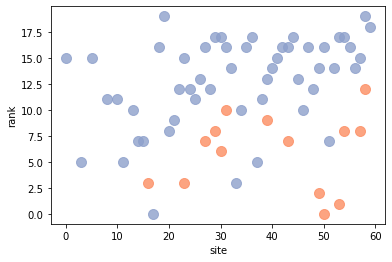

In [46]:
# ***!! Should try something like this but with a summed score? would that work?
# thinking about ways to visualize rank change across sites
# the problem with this is that you can't really see what happened to locations that 
# were not ranked because it didn't make it into the top 20
# I don't think this is a good fig, but keep brainstorming

df_pheno, mx_present = identify_top_phenos('present',20,1,1)
df_pheno, mx_f2100 = identify_top_phenos('f2100',20,1,1)
plt.scatter(np.arange(60), 20-mx_present[58], color='#8da0cb', alpha=0.8, s=100)
plt.scatter(np.arange(60), 20-mx_f2100[58], color='#fc8d62', alpha=0.8, s=100)
plt.xlabel('site')
plt.ylabel('rank')

### Try plotting scatterplot between temp & performance?

Text(0, 0.5, 'yield')

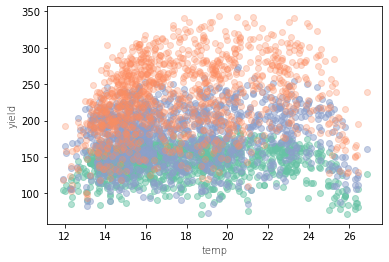

In [66]:
pheno=76
df_sub = df_all.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear, 
            color='#66c2a5', alpha=0.5)

pheno=5
df_sub = df_all.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear,
            color='#8da0cb', alpha=0.5)

pheno=9
df_sub = df_all.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear,
            color='#fc8d62', alpha=0.3)

plt.xlabel('temp', fontweight='light')
plt.ylabel('yield', fontweight='light')

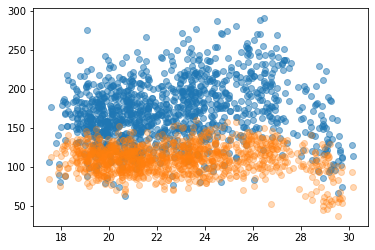

In [27]:
pheno=89
df_sub = df_all_f2100.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear, alpha=0.5)

pheno=44
df_sub = df_all_f2100.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear, alpha=0.3)

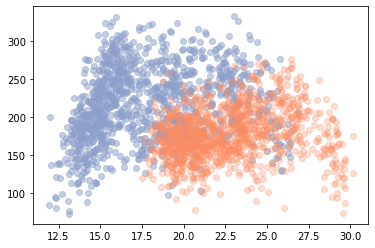

In [51]:
pheno=88
df_sub = df_all.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear, 
            color='#8da0cb', alpha=0.5)
df_sub = df_all_f2100.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear, 
            color='#fc8d62', alpha=0.3)

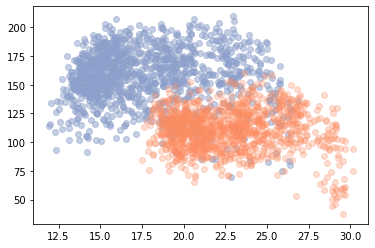

In [69]:
pheno=44
df_sub = df_all.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear, 
            color='#8da0cb', alpha=0.5)
df_sub = df_all_f2100.query(f'cvar=={pheno}')
plt.scatter(df_sub.temp, df_sub.dm_ear, 
            color='#fc8d62', alpha=0.3)

## Trying to figure out what's up with precip
- Why do we see this clear relationship between precip & yield, but don't really see a clear relationship in most of the processes?
- I know that water stress (identiifed through leaf water potential) more directly links with gs. However, I can't pick up how that signal propagates downstream.
- I thought maybe water stress imapcts thorugh gs was minimal, and the larger impact likely came from impacts on leaf expansion, and thus total leaf area. However, I'm having a hard time picking up a clear enough relationship.
- So now this really puzzels me. Why am I seeing this pretty strong relationship between precip and final yield, but can't seem to figure out what is actually causing this difference!?

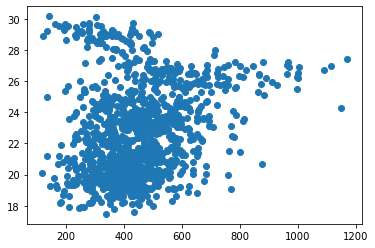

In [117]:
plt.scatter(df_sub.precip, df_sub.temp)

Text(0, 0.5, 'yield')

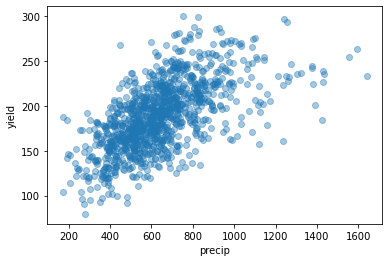

In [80]:
pheno=81
df_sub = df_all.query(f'cvar=={pheno}')
plt.scatter(df_sub.precip, df_sub.dm_ear, alpha=0.4)
df_sub = df_all_f2100.query(f'cvar=={pheno}')
#plt.scatter(df_sub.precip, df_sub.dm_ear, alpha=0.2)
plt.xlabel('precip')
plt.ylabel('yield')

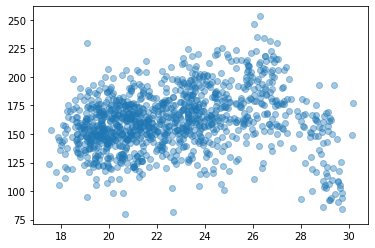

In [119]:
plt.scatter(df_sub.temp, df_sub.dm_ear, alpha=0.4)

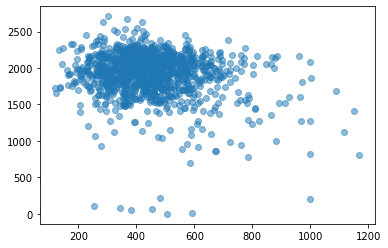

In [106]:
pheno = 44
df_leaves_sub = df_leaves.query(f'cvar=={pheno}').groupby(['site','year']).max().LA.reset_index()
df_wea.site = df_wea.site.astype(int)
df_leaves_sub_merged = df_leaves_sub.merge(df_wea, on=['site','year'])
plt.scatter(df_leaves_sub_merged.precip, df_leaves_sub_merged.LA, alpha=0.5)

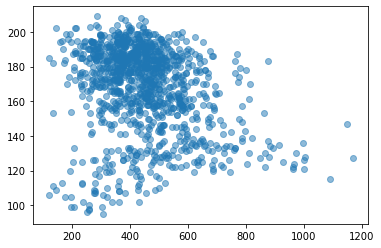

In [114]:
pheno = 44

df_pheno_sub = df_phenology[df_phenology.pheno=='"grainFill"'].query(f'cvar=={pheno}')
df_wea.site = df_wea.site.astype(int)
df_pheno_sub_merged = df_pheno_sub.merge(df_wea, on=['site','year'])
df_pheno_sub_merged.head()

plt.scatter(df_pheno_sub_merged.precip, df_pheno_sub_merged.jday, alpha=0.5)
# this nonsense pattern is probably just confounded with temp

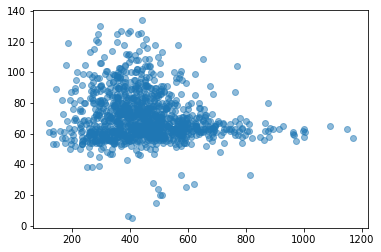

In [115]:
plt.scatter(df_pheno_sub_merged.precip, df_pheno_sub_merged.pheno_days, alpha=0.5)
# this nonsense pattern is probably just confounded with temp

Text(0, 0.5, 'yield')

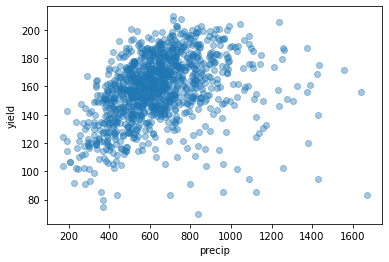

In [75]:
pheno=44
df_sub = df_all.query(f'cvar=={pheno}')
plt.scatter(df_sub.precip, df_sub.dm_ear, alpha=0.4)
df_sub = df_all_f2100.query(f'cvar=={pheno}')
#plt.scatter(df_sub.precip, df_sub.dm_ear, alpha=0.2)
plt.xlabel('precip')
plt.ylabel('yield')

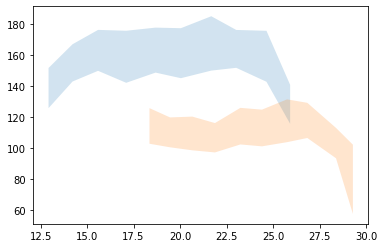

In [31]:
pheno=44
df_s = df_all.query(f'cvar=={pheno}')

n_bins=10
bins = pd.cut(df_s.temp, n_bins, labels=np.arange(n_bins).tolist())
df_sub = df_s.copy()
df_sub.loc[:,'bins'] = bins

upper_yield = [round(np.percentile(df_sub.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
mid_yield = [round(np.percentile(df_sub.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
lower_yield = [round(np.percentile(df_sub.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
temp_means = df_sub.groupby('bins').mean().temp
plt.fill_between(temp_means, upper_yield, lower_yield, alpha=0.2)

df_s = df_all_f2100.query(f'cvar=={pheno}')

n_bins=10
bins = pd.cut(df_s.temp, n_bins, labels=np.arange(n_bins).tolist())
df_sub = df_s.copy()
df_sub.loc[:,'bins'] = bins

upper_yield = [round(np.percentile(df_sub.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
mid_yield = [round(np.percentile(df_sub.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
lower_yield = [round(np.percentile(df_sub.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
temp_means = df_sub.groupby('bins').mean().temp
plt.fill_between(temp_means, upper_yield, lower_yield, alpha=0.2)

## Performance in cspace

All site-years in climate space:

Text(0, 0.5, 'precip')

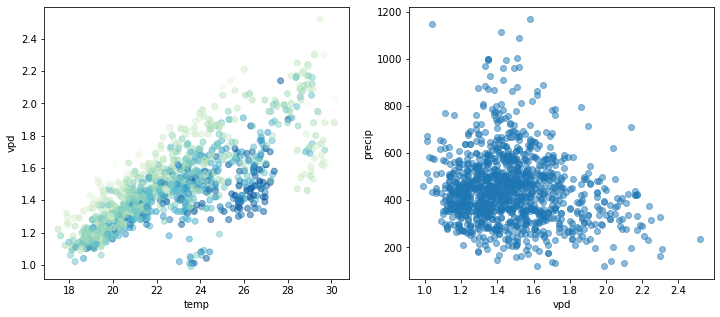

In [243]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_wea.temp, df_wea.vpd, c=df_wea.precip, 
            cmap=GnBu_8.mpl_colormap, alpha=0.5, vmax=700)
ax1.set_xlabel('temp')
ax1.set_ylabel('vpd')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_wea.vpd, df_wea.precip, alpha=0.5)
ax2.set_xlabel('vpd')
ax2.set_ylabel('precip')

### Cluster based on site-year climate info
- Treating each site-year as individual samples
- One down side with treating each site-year as individuals is that it's hard to relate to the clustered groups. Can't project back onto a map.
- Can think about tweaking what features to use to cluster sites, but I don't think it'll make a big difference.
- Q: should I pre-process before clustering?

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_climate = df_wea[['temp', 'vpd', 'precip']]
df_climate_std = StandardScaler().fit_transform(df_climate)

kmeans_mod = KMeans(n_clusters=4)
kmeans_mod.fit(df_climate_std)
y_kmeans = kmeans_mod.predict(df_climate_std)

df_cluster = df_wea.copy()
df_cluster['group'] = y_kmeans

df_km0 = df_cluster.query('group==0')
df_km1 = df_cluster.query('group==1')
df_km2 = df_cluster.query('group==2')
df_km3 = df_cluster.query('group==3')
df_km4 = df_cluster.query('group==4')

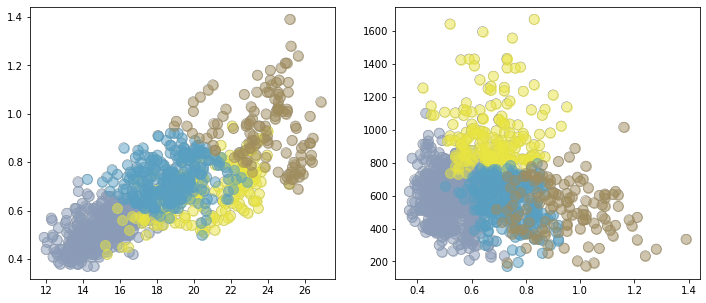

In [5]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_wea.temp, df_wea.vpd, facecolor='none', edgecolor='grey', linewidth=0.5, s=100)
ax1.scatter(df_km0.temp, df_km0.vpd, color=Aquatic2_5.mpl_colors[0], s=100, alpha=0.5)
ax1.scatter(df_km1.temp, df_km1.vpd, color=Aquatic2_5.mpl_colors[1], s=100, alpha=0.5)
ax1.scatter(df_km2.temp, df_km2.vpd, color=Aquatic2_5.mpl_colors[2], s=100, alpha=0.5)
ax1.scatter(df_km3.temp, df_km3.vpd, color=Aquatic2_5.mpl_colors[3], s=100, alpha=0.5)
ax1.scatter(df_km4.temp, df_km4.vpd, color=Aquatic2_5.mpl_colors[4], s=100, alpha=0.5)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_wea.vpd, df_wea.precip, facecolor='none', edgecolor='grey', linewidth=0.5, s=100)
ax2.scatter(df_km0.vpd, df_km0.precip, color=Aquatic2_5.mpl_colors[0], s=100, alpha=0.5)
ax2.scatter(df_km1.vpd, df_km1.precip, color=Aquatic2_5.mpl_colors[1], s=100, alpha=0.5)
ax2.scatter(df_km2.vpd, df_km2.precip, color=Aquatic2_5.mpl_colors[2], s=100, alpha=0.5)
ax2.scatter(df_km3.vpd, df_km3.precip, color=Aquatic2_5.mpl_colors[3], s=100, alpha=0.5)
ax2.scatter(df_km4.vpd, df_km4.precip, color=Aquatic2_5.mpl_colors[4], s=100, alpha=0.5)


### Cluster based on sites

Phenotype performance within clustered sites:

In [9]:
df_climate = df_all.groupby('site').mean()[['temp', 'vpd', 'precip']]
df_climate_std = StandardScaler().fit_transform(df_climate)

kmeans_mod = KMeans(n_clusters=4)
kmeans_mod.fit(df_climate_std)
y_kmeans = kmeans_mod.predict(df_climate_std)

df_cluster = df_climate.copy()
df_cluster['group'] = y_kmeans

df_km0 = df_cluster.query('group==0')
df_km1 = df_cluster.query('group==1')
df_km2 = df_cluster.query('group==2')
df_km3 = df_cluster.query('group==3')

df_sites.site = df_sites.site.astype(int)
df_clustered_sites = pd.merge(df_cluster, df_sites, left_on='site', right_on='site')

In [10]:
df_km0_sites = pd.merge(df_km0, df_sites, on='site')
df_km1_sites = pd.merge(df_km1, df_sites, on='site')
df_km2_sites = pd.merge(df_km2, df_sites, on='site')
df_km3_sites = pd.merge(df_km3, df_sites, on='site')

Text(0.5, 1.0, 'Clustered sites')

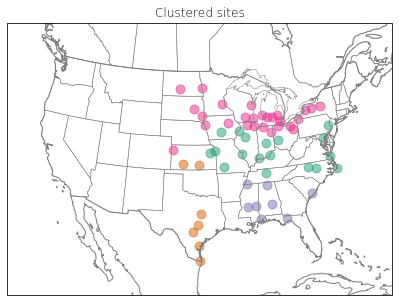

In [11]:
fig = plt.figure(figsize=(8,5))
extent = [-123, -72, 19, 53]

ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
mp = ax.scatter(df_km0_sites.lon, df_km0_sites.lat, 
                color=Dark2_4.mpl_colors[0], 
                s=80, alpha=0.5, transform=ccrs.PlateCarree())
mp = ax.scatter(df_km1_sites.lon, df_km1_sites.lat, 
                color=Dark2_4.mpl_colors[3], 
                s=80, alpha=0.5, transform=ccrs.PlateCarree())
mp = ax.scatter(df_km2_sites.lon, df_km2_sites.lat, 
                color=Dark2_4.mpl_colors[1], 
                s=80, alpha=0.5, transform=ccrs.PlateCarree())
mp = ax.scatter(df_km3_sites.lon, df_km3_sites.lat, 
                color=Dark2_4.mpl_colors[2], 
                s=80, alpha=0.5, transform=ccrs.PlateCarree())

ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title('Clustered sites', fontweight='light', size=12)

#fig.colorbar(mp, shrink=0.5)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/map_clustered_sites.png', format='png', dpi=800)

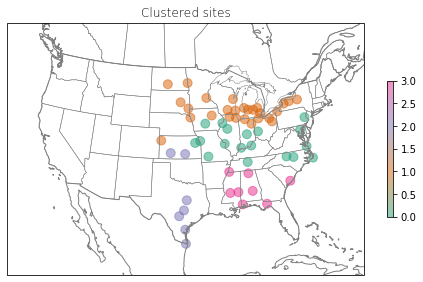

In [12]:
fig = plt.figure(figsize=(8,5))
extent = [-123, -72, 19, 53]

ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
mp = ax.scatter(df_clustered_sites.lon, df_clustered_sites.lat, 
                c=df_clustered_sites.group, cmap=Dark2_4.mpl_colormap, 
                s=80, alpha=0.5, transform=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title('Clustered sites', fontweight='light', size=12)

fig.colorbar(mp, shrink=0.5)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/map_clustered_sites.png', format='png', dpi=800)

In [29]:
# fetch clustered sites indexes
km0_sites = df_clustered_sites[df_clustered_sites.site.isin(df_km0_sites.site)].index.tolist()
km1_sites = df_clustered_sites[df_clustered_sites.site.isin(df_km1_sites.site)].index.tolist()
km2_sites = df_clustered_sites[df_clustered_sites.site.isin(df_km2_sites.site)].index.tolist()
km3_sites = df_clustered_sites[df_clustered_sites.site.isin(df_km3_sites.site)].index.tolist()

[Text(0, 0, '4'),
 Text(1, 0, '65'),
 Text(2, 0, '90'),
 Text(3, 0, '46'),
 Text(4, 0, '58'),
 Text(5, 0, '42'),
 Text(6, 0, '63'),
 Text(7, 0, '50'),
 Text(8, 0, '44'),
 Text(9, 0, '62'),
 Text(10, 0, '57'),
 Text(11, 0, '81'),
 Text(12, 0, '84'),
 Text(13, 0, '9'),
 Text(14, 0, '48'),
 Text(15, 0, '88'),
 Text(16, 0, '78'),
 Text(17, 0, '59'),
 Text(18, 0, '55'),
 Text(19, 0, '5'),
 Text(20, 0, '7'),
 Text(21, 0, '76'),
 Text(22, 0, '38'),
 Text(23, 0, '35'),
 Text(24, 0, '29'),
 Text(25, 0, '89'),
 Text(26, 0, '0'),
 Text(27, 0, '18'),
 Text(28, 0, '12'),
 Text(29, 0, '66'),
 Text(30, 0, '77'),
 Text(31, 0, '85'),
 Text(32, 0, '15'),
 Text(33, 0, '30'),
 Text(34, 0, '43'),
 Text(35, 0, '24'),
 Text(36, 0, '87'),
 Text(37, 0, '8'),
 Text(38, 0, '3'),
 Text(39, 0, '79'),
 Text(40, 0, '25'),
 Text(41, 0, '73'),
 Text(42, 0, '16'),
 Text(43, 0, '52'),
 Text(44, 0, '21'),
 Text(45, 0, '14'),
 Text(46, 0, '86'),
 Text(47, 0, '40'),
 Text(48, 0, '28'),
 Text(49, 0, '54')]

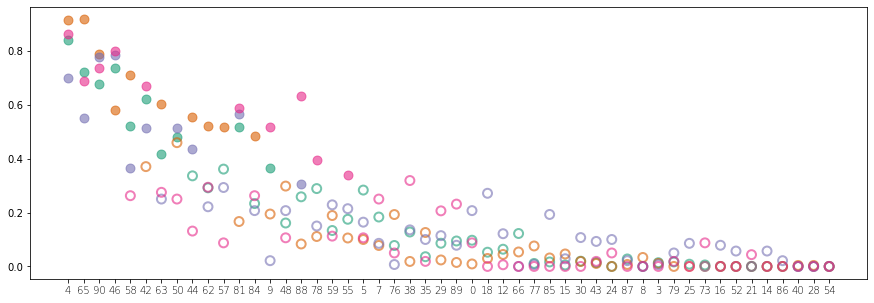

In [169]:
# visualization
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

top_phenos = rank_top_phenos('present',20,1,1)

scores = []
sites = [km0_sites, km1_sites, km2_sites, km3_sites]
colors = [Dark2_4.mpl_colors[0], Dark2_4.mpl_colors[1],
          Dark2_4.mpl_colors[2], Dark2_4.mpl_colors[3]]

for site, color in zip(sites, colors):    
    scores = []
    for item in np.arange(len(top_phenos)):
        score = np.nansum(20-mx_present[np.ix_(top_phenos, site)][item])/(20*len(site))
        scores.append(score)

    df_scores = pd.DataFrame({'score': scores}).sort_values(by='score', ascending=False)
    scores_solid = df_scores[:10]['score']
    xs_solid = scores_solid.index
    scores_hollow = df_scores[10:]['score']
    xs_hollow = scores_hollow.index    
        
    ax.scatter(xs_solid, scores_solid,
               s=80, color=color, alpha=0.6)
    ax.scatter(xs_hollow, scores_hollow,
               s=80, facecolor='none', edgecolor=color, 
               linewidth=2, alpha=0.6)

ax.set_xticks(np.arange(50))
ax.set_xticklabels(top_phenos, fontweight='light')

[Text(0, 0, '4'),
 Text(1, 0, '65'),
 Text(2, 0, '90'),
 Text(3, 0, '46'),
 Text(4, 0, '58'),
 Text(5, 0, '42'),
 Text(6, 0, '63'),
 Text(7, 0, '50'),
 Text(8, 0, '44'),
 Text(9, 0, '62'),
 Text(10, 0, '57'),
 Text(11, 0, '81'),
 Text(12, 0, '84'),
 Text(13, 0, '9'),
 Text(14, 0, '48'),
 Text(15, 0, '88'),
 Text(16, 0, '78'),
 Text(17, 0, '59'),
 Text(18, 0, '55'),
 Text(19, 0, '5'),
 Text(20, 0, '7'),
 Text(21, 0, '76'),
 Text(22, 0, '38'),
 Text(23, 0, '35'),
 Text(24, 0, '29'),
 Text(25, 0, '89'),
 Text(26, 0, '0'),
 Text(27, 0, '18'),
 Text(28, 0, '12'),
 Text(29, 0, '66'),
 Text(30, 0, '77'),
 Text(31, 0, '85'),
 Text(32, 0, '15'),
 Text(33, 0, '30'),
 Text(34, 0, '43'),
 Text(35, 0, '24'),
 Text(36, 0, '87'),
 Text(37, 0, '8'),
 Text(38, 0, '3'),
 Text(39, 0, '79'),
 Text(40, 0, '25'),
 Text(41, 0, '73'),
 Text(42, 0, '16'),
 Text(43, 0, '52'),
 Text(44, 0, '21'),
 Text(45, 0, '14'),
 Text(46, 0, '86'),
 Text(47, 0, '40'),
 Text(48, 0, '28'),
 Text(49, 0, '54')]

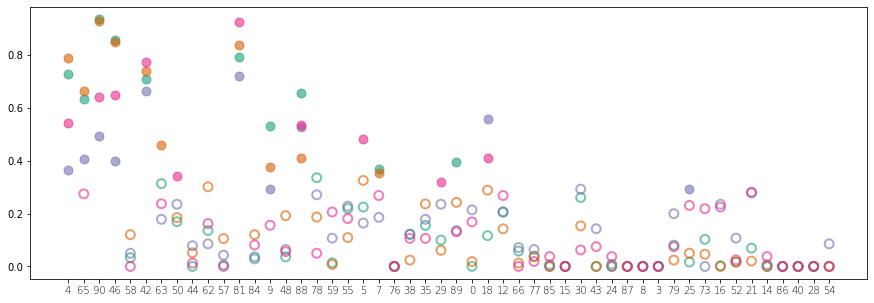

In [170]:
# visualization
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

top_phenos = rank_top_phenos('present',20,1,1)

scores = []
sites = [km0_sites, km1_sites, km2_sites, km3_sites]
colors = [Dark2_4.mpl_colors[0], Dark2_4.mpl_colors[1],
          Dark2_4.mpl_colors[2], Dark2_4.mpl_colors[3]]

for site, color in zip(sites, colors):    
    scores = []
    for item in np.arange(len(top_phenos)):
        score = np.nansum(20-mx_f2100[np.ix_(top_phenos, site)][item])/(20*len(site))
        scores.append(score)

    df_scores = pd.DataFrame({'score': scores}).sort_values(by='score', ascending=False)
    scores_solid = df_scores[:10]['score']
    xs_solid = scores_solid.index
    scores_hollow = df_scores[10:]['score']
    xs_hollow = scores_hollow.index    
        
    ax.scatter(xs_solid, scores_solid,
               s=80, color=color, alpha=0.6)
    ax.scatter(xs_hollow, scores_hollow,
               s=80, facecolor='none', edgecolor=color, 
               linewidth=2, alpha=0.6)

ax.set_xticks(np.arange(50))
ax.set_xticklabels(top_phenos, fontweight='light')

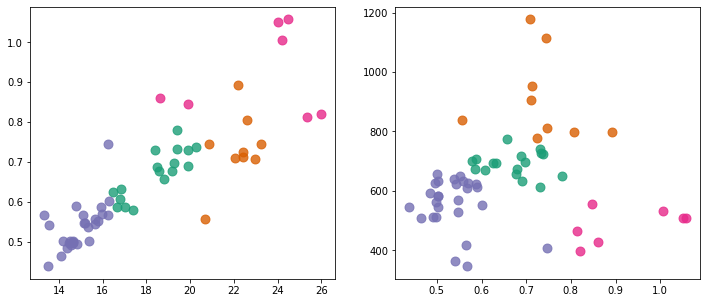

In [613]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_climate[df_climate.site.isin(df_km0.index)].temp, 
            df_climate[df_climate.site.isin(df_km0.index)].vpd, 
            color=Dark2_4.mpl_colors[0], s=80, alpha=0.8)
ax1.scatter(df_climate[df_climate.site.isin(df_km1.index)].temp, 
            df_climate[df_climate.site.isin(df_km1.index)].vpd, 
            color=Dark2_4.mpl_colors[3], s=80, alpha=0.8)
ax1.scatter(df_climate[df_climate.site.isin(df_km2.index)].temp, 
            df_climate[df_climate.site.isin(df_km2.index)].vpd, 
            color=Dark2_4.mpl_colors[1], s=80, alpha=0.8)
ax1.scatter(df_climate[df_climate.site.isin(df_km3.index)].temp, 
            df_climate[df_climate.site.isin(df_km3.index)].vpd, 
            color=Dark2_4.mpl_colors[2], s=80, alpha=0.8)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_climate[df_climate.site.isin(df_km0.index)].vpd, 
            df_climate[df_climate.site.isin(df_km0.index)].precip, 
            color=Dark2_4.mpl_colors[0], s=80, alpha=0.8)
ax2.scatter(df_climate[df_climate.site.isin(df_km1.index)].vpd, 
            df_climate[df_climate.site.isin(df_km1.index)].precip, 
            color=Dark2_4.mpl_colors[3], s=80, alpha=0.8)
ax2.scatter(df_climate[df_climate.site.isin(df_km2.index)].vpd, 
            df_climate[df_climate.site.isin(df_km2.index)].precip, 
            color=Dark2_4.mpl_colors[1], s=80, alpha=0.8)
ax2.scatter(df_climate[df_climate.site.isin(df_km3.index)].vpd, 
            df_climate[df_climate.site.isin(df_km3.index)].precip, 
            color=Dark2_4.mpl_colors[2], s=80, alpha=0.8)

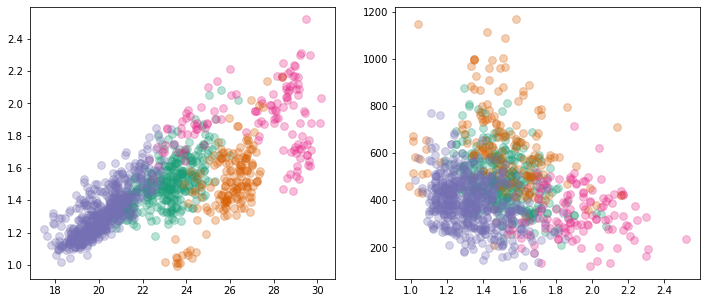

In [612]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_wea[df_wea.site.isin(df_km0.index)].temp, 
            df_wea[df_wea.site.isin(df_km0.index)].vpd, 
            color=Dark2_4.mpl_colors[0], s=60, alpha=0.3)
ax1.scatter(df_wea[df_wea.site.isin(df_km1.index)].temp, 
            df_wea[df_wea.site.isin(df_km1.index)].vpd, 
            color=Dark2_4.mpl_colors[3], s=60, alpha=0.3)
ax1.scatter(df_wea[df_wea.site.isin(df_km2.index)].temp, 
            df_wea[df_wea.site.isin(df_km2.index)].vpd, 
            color=Dark2_4.mpl_colors[1], s=60, alpha=0.3)
ax1.scatter(df_wea[df_wea.site.isin(df_km3.index)].temp, 
            df_wea[df_wea.site.isin(df_km3.index)].vpd, 
            color=Dark2_4.mpl_colors[2], s=60, alpha=0.3)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_wea[df_wea.site.isin(df_km0.index)].vpd, 
            df_wea[df_wea.site.isin(df_km0.index)].precip, 
            color=Dark2_4.mpl_colors[0], s=60, alpha=0.3)
ax2.scatter(df_wea[df_wea.site.isin(df_km1.index)].vpd, 
            df_wea[df_wea.site.isin(df_km1.index)].precip, 
            color=Dark2_4.mpl_colors[3], s=60, alpha=0.3)
ax2.scatter(df_wea[df_wea.site.isin(df_km2.index)].vpd, 
            df_wea[df_wea.site.isin(df_km2.index)].precip, 
            color=Dark2_4.mpl_colors[1], s=60, alpha=0.3)
ax2.scatter(df_wea[df_wea.site.isin(df_km3.index)].vpd, 
            df_wea[df_wea.site.isin(df_km3.index)].precip, 
            color=Dark2_4.mpl_colors[2], s=60, alpha=0.3)

In [332]:
pheno = 9
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_present[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,9.000000
1,14.966720,0.536911,558.442655,11.250000
2,23.213409,0.922158,484.791526,17.000000
3,22.352994,0.755769,917.044462,6.166667


In [326]:
pheno = 50
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_f2100[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,13.900000
1,14.966720,0.536911,558.442655,15.238095
2,23.213409,0.922158,484.791526,13.400000
3,22.352994,0.755769,917.044462,12.142857


In [327]:
pheno = 81
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_present[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,7.600000
1,14.966720,0.536911,558.442655,13.076923
2,23.213409,0.922158,484.791526,4.200000
3,22.352994,0.755769,917.044462,8.250000


In [329]:
pheno = 81
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_f2100[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,4.111111
1,14.966720,0.536911,558.442655,3.222222
2,23.213409,0.922158,484.791526,3.166667
3,22.352994,0.755769,917.044462,1.500000


In [294]:
pheno = 7
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_present[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,14.500000
1,14.966720,0.536911,558.442655,16.769231
2,23.213409,0.922158,484.791526,16.000000
3,22.352994,0.755769,917.044462,13.333333


In [291]:
pheno = 65
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_present[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,4.705882
1,14.966720,0.536911,558.442655,1.666667
2,23.213409,0.922158,484.791526,4.600000
3,22.352994,0.755769,917.044462,4.285714


In [290]:
pheno = 42
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_present[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,6.000000
1,14.966720,0.536911,558.442655,11.304348
2,23.213409,0.922158,484.791526,8.000000
3,22.352994,0.755769,917.044462,6.625000


In [288]:
pheno = 5
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_present[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,12.153846
1,14.966720,0.536911,558.442655,12.285714
2,23.213409,0.922158,484.791526,8.500000
3,22.352994,0.755769,917.044462,15.750000


In [289]:
pheno = 84
df_clustered_performance = df_cluster.copy()
df_clustered_performance['performance'] = mx_present[pheno]
df_clustered_performance.groupby('group').mean()

,temp,vpd,precip,performance
group,,,,
0,18.527877,0.665334,699.100767,13.538462
1,14.966720,0.536911,558.442655,9.923077
2,23.213409,0.922158,484.791526,14.200000
3,22.352994,0.755769,917.044462,13.000000


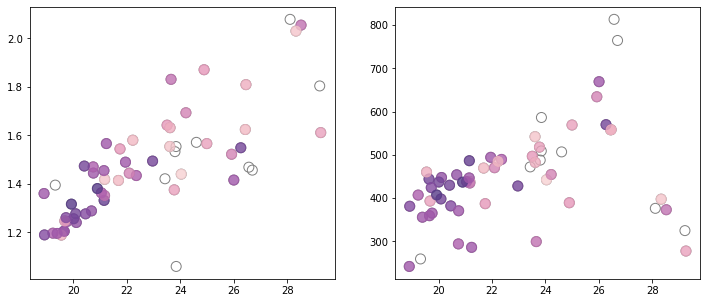

In [160]:
pheno=84

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().vpd,
            facecolor='none', edgecolor='grey',s=100)
ax1.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().vpd,
            alpha=0.8, s=100, c=mx_present[pheno], cmap=PurpOr_6.mpl_colormap.reversed(), vmax=20)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().precip,
            facecolor='none', edgecolor='grey',s=100)
ax2.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().precip,
            alpha=0.8, s=100, c=mx_present[pheno], cmap=PurpOr_6.mpl_colormap.reversed(), vmax=20)

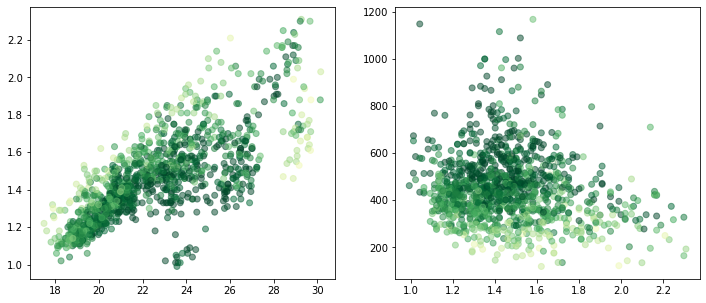

In [174]:
pheno=4
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df.temp, df.vpd, c=df.dm_ear, cmap=YlGn_9.mpl_colormap, alpha=0.5, vmax=240)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df.vpd, df.precip, c=df.dm_ear, cmap=YlGn_9.mpl_colormap, alpha=0.5, vmax=240)

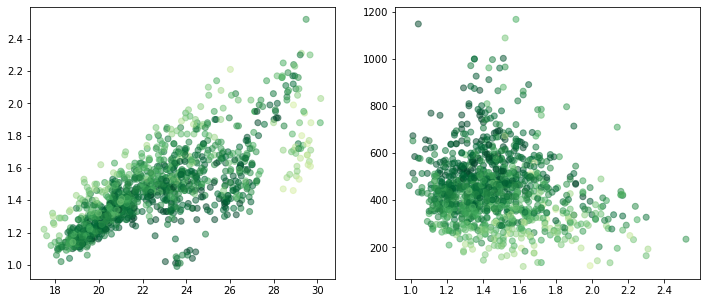

In [173]:
pheno=62
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df.temp, df.vpd, c=df.dm_ear, cmap=YlGn_9.mpl_colormap, alpha=0.5, vmax=200)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df.vpd, df.precip, c=df.dm_ear, cmap=YlGn_9.mpl_colormap, alpha=0.5, vmax=200)
#ax2.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().precip,
#            facecolor='none', edgecolor='grey',s=100)
#ax2.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().precip,
#            alpha=0.8, s=100, c=mx_present[pheno], cmap=PurpOr_6.mpl_colormap.reversed(), vmax=20)

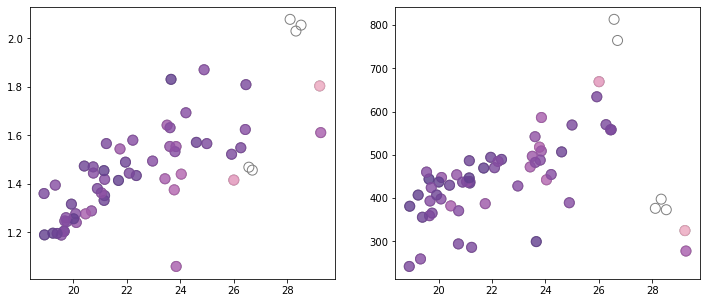

In [133]:
pheno=4

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().vpd,
            facecolor='none', edgecolor='grey',s=100)
ax1.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().vpd,
            alpha=0.8, s=100, c=mx_f2100[pheno], cmap=PurpOr_6.mpl_colormap.reversed(), vmax=20)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().precip,
            facecolor='none', edgecolor='grey',s=100)
ax2.scatter(df_wea.groupby('site').mean().temp, df_wea.groupby('site').mean().precip,
            alpha=0.8, s=100, c=mx_f2100[pheno], cmap=PurpOr_6.mpl_colormap.reversed(), vmax=20)

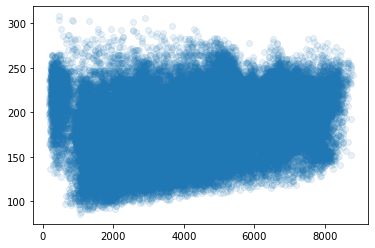

In [39]:
df_leaves_matured = df_leaves[df_leaves.pheno=='"grainFill"']
test = df_leaves_matured.merge(df_pheno_gf, on=['cvar','site','year'])
plt.scatter(test.LA, test.jday, alpha=0.1)

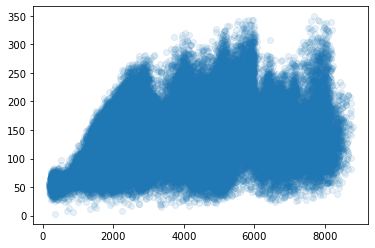

In [40]:
#df_all.site = df_all.site.astype(int)
df_leaves_matured = df_leaves[df_leaves.pheno=='"grainFill"']
test = df_leaves_matured.merge(df_all, on=['cvar','site','year'])
#plt.scatter(test.query('cvar==4').LA_x, test.query('cvar==4').dm_ear, alpha=0.5)
plt.scatter(test.LA_x, test.dm_ear, alpha=0.1)

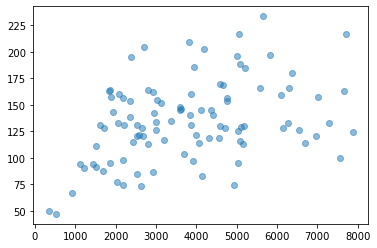

In [41]:
dm_ears = df_all.groupby('cvar').mean().dm_ear.reindex(phenos_ranked)
plt.scatter(LA, dm_ears, alpha=0.5)

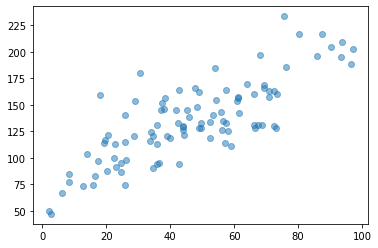

In [42]:
plt.scatter(gf_lengths, dm_ears, alpha=0.5)

## Performance in map

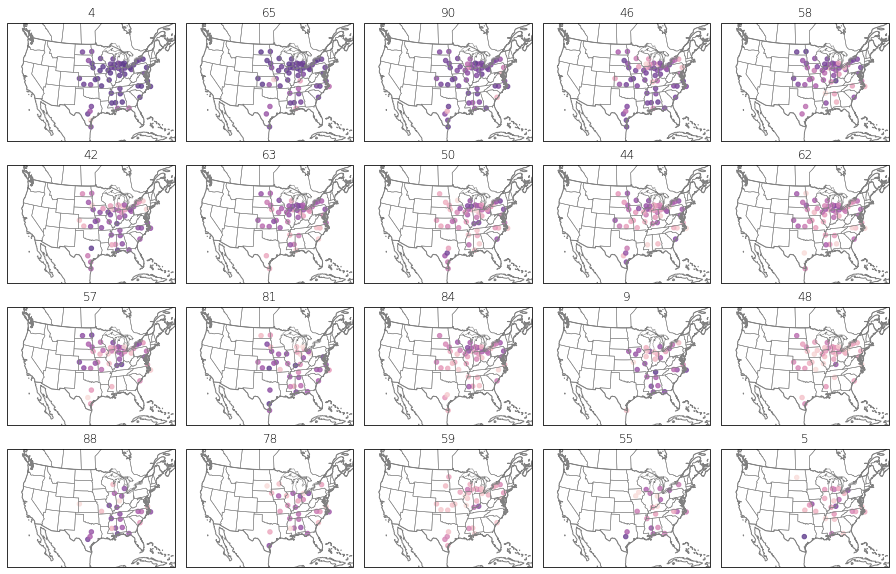

In [128]:
# Identify top phenos
df_pheno, mx = identify_top_phenos('present',20,1,1)
top_phenos = rank_top_phenos('present',20,1,1)

# Visualization
fig = plt.figure(figsize=(16,10))

for item, pheno in enumerate(top_phenos[:20]):
    ax = fig.add_subplot(4,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123, -72, 19, 53])
    mp = ax.scatter(df_sites.lon, df_sites.lat, transform=ccrs.PlateCarree(),
                    c = mx[pheno], cmap=PurpOr_6.mpl_colormap.reversed(),
                    vmin=0, vmax=20, alpha=0.8, s=20)
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set_title(pheno, fontweight='light')

fig.subplots_adjust(wspace=0)
    
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/maps_top_pheno_ranking.png', format='png', dpi=800)

In [39]:
phenos_improved, phenos_targeted, phenos_new = identify_improved_phenos(20, 1, 1, 'f2100', 20)

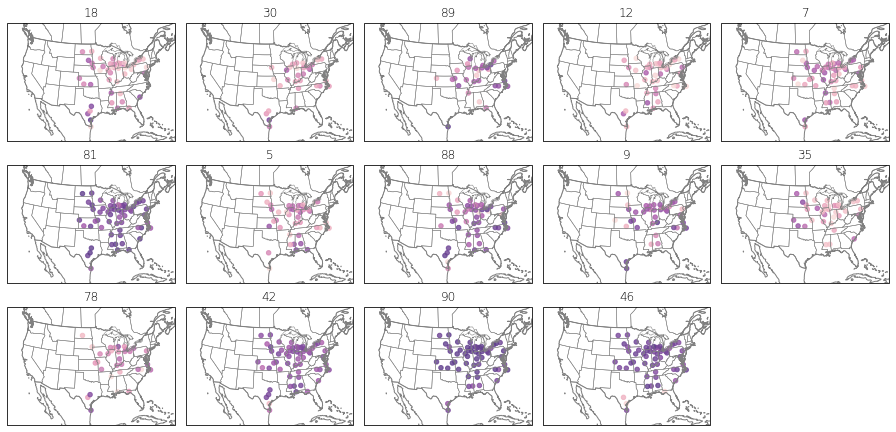

In [38]:
# Identify improved phenos under future climate
phenos_improved, phenos_targeted, phenos_new = identify_improved_phenos(20, 1, 1, 'f2100', 20)

# Identify pheno rankings under future climate sims
df_pheno, mx = identify_top_phenos('f2100', 20, 1, 1)

# Visualization
fig = plt.figure(figsize=(16,10))

for item, pheno in enumerate(phenos_targeted):
    ax = fig.add_subplot(4,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123, -72, 19, 53])
    mp = ax.scatter(df_sites.lon, df_sites.lat, transform=ccrs.PlateCarree(),
                    c = mx[pheno], cmap=PurpOr_6.mpl_colormap.reversed(),
                    vmin=0, vmax=20, alpha=0.8, s=20)
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set_title(pheno, fontweight='light')

fig.subplots_adjust(wspace=0)